In [5]:
import pandas as pd 
data = pd.read_csv(r'C:\Users\Arams\OneDrive\Skrivbord\WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r'C:\Users\Arams\OneDrive\Skrivbord\WA_Fn-UseC_-Telco-Customer-Churn.csv') 

In [9]:
print(data.head())
print(data.describe())
print(data.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [10]:
data = data.dropna()

In [14]:
data = pd.get_dummies(data, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                        'PaperlessBilling', 'PaymentMethod', 'Churn'])

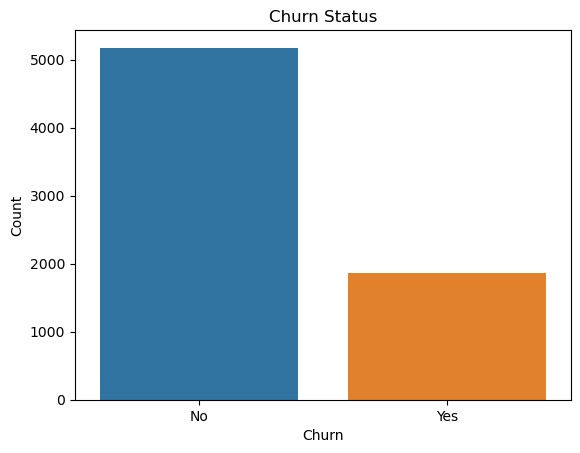

In [13]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Status')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X = data.drop(['Churn_No', 'Churn_Yes'], axis=1)
y = data[['Churn_No', 'Churn_Yes']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


data = pd.read_csv(r'C:\Users\Arams\OneDrive\Skrivbord\WA_Fn-UseC_-Telco-Customer-Churn.csv')


X = data.drop(['customerID'], axis=1)


if 'Churn' in data.columns:
    y = data['Churn']
else:
    y = None


if y is not None:
    
    X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

   
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_train.mean())

    
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    
    rf_predictions = rf_model.predict(X_test)

    
    print("Random Forest Classifier:")
    print("Accuracy:", accuracy_score(y_test, rf_predictions))
    print("Classification Report:\n", classification_report(y_test, rf_predictions))
else:
    print("Churn column not found.")


Random Forest Classifier:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      1036
         Yes       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd



X = data.drop(['customerID'], axis=1)


if 'Churn' in data.columns:
    y = data['Churn']
else:
    y = None


if y is not None:
    
    X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

    
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_train.mean())

   
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    
    nn_predictions = (model.predict(X_test) > 0.5).astype("int32")

   
    print("\nNeural Network Classifier:")
    print("Accuracy:", accuracy_score(y_test, nn_predictions))
    print("Classification Report:\n", classification_report(y_test, nn_predictions))
else:
    print("Churn column not found.")


ModuleNotFoundError: No module named 'tensorflow'

In [5]:
pip install tensorflow


     -------------------------------------- 300.9/300.9 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 15.6 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 19.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 21.5 MB/s eta 0:00:00
     ------------------------------------- 442.0/442.0 kB 13.9 MB/s eta 0:00:00
     ------------------------------------- 938.6/938.6 kB 14.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 14.5 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 8.0 MB/s eta 0:00:00
     ------------------------------------- 413.4/413.4 kB 25.2 MB/s eta 0:00:00
     ---------------------------------------

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Läs in data
data = pd.read_csv(r'C:\Users\Arams\OneDrive\Skrivbord\WA_Fn-UseC_-Telco-Customer-Churn.csv')  

X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']


X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=42))])

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Classifier:
Accuracy: 0.794889992902768
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [34]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import tensorflow.keras as keras


data = pd.read_csv(r'C:\Users\Arams\OneDrive\Skrivbord\WA_Fn-UseC_-Telco-Customer-Churn.csv')




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


label_encoders = {}
y_train_encoded = np.zeros((y_train.shape[0], y_train.nunique()), dtype=int)
y_test_encoded = np.zeros((y_test.shape[0], y_test.nunique()), dtype=int)

for i, col in enumerate(y_train.unique()):
    label_encoder = LabelEncoder()
    y_train_encoded[:, i] = label_encoder.fit_transform(y_train == col)
    y_test_encoded[:, i] = label_encoder.transform(y_test == col)
    label_encoders[col] = label_encoder


onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded)
y_test_onehot = onehot_encoder.transform(y_test_encoded)


imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


for col in X_train_imputed.select_dtypes(include=['object']).columns:
    label_encoder_X = LabelEncoder()
    X_train_imputed[col] = label_encoder_X.fit_transform(X_train_imputed[col])
   
    X_test_imputed[col] = label_encoder_X.transform(X_test_imputed[col].map(lambda s: s if s in label_encoder_X.classes_ else label_encoder_X.classes_[0]))


nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_imputed.shape[1],)),
    Dense(y_train_onehot.shape[1], activation='softmax')  
])



nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Träna modellen
nn_model.fit(X_train_imputed, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test_imputed, y_test_onehot))


nn_predictions = nn_model.predict(X_test_imputed)
nn_predictions = np.argmax(nn_predictions, axis=1)  

print("\nNeural Network (TensorFlow and Keras):")
print("Accuracy:", accuracy_score(np.argmax(y_test_onehot, axis=1), nn_predictions))
print("Classification Report:\n", classification_report(np.argmax(y_test_onehot, axis=1), nn_predictions))



C:\Users\Arams\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
177/177 [==============================] - 3s 8ms/step - loss: 149.5692 - accuracy: 0.4707 - val_loss: 52.4247 - val_accuracy: 0.0468
Epoch 2/10
177/177 [==============================] - 1s 4ms/step - loss: 71.1690 - accuracy: 0.4531 - val_loss: 70.3432 - val_accuracy: 0.2399
Epoch 3/10
177/177 [==============================] - 1s 4ms/step - loss: 46.0114 - accuracy: 0.4043 - val_loss: 45.0624 - val_accuracy: 0.0603
Epoch 4/10
177/177 [==============================] - 1s 3ms/step - loss: 70.6029 - accuracy: 0.3855 - val_loss: 59.1519 - val_accuracy: 0.0561
Epoch 5/10
177/177 [==============================] - 1s 3ms/step - loss: 94.4576 - accuracy: 0.3916 - val_loss: 53.3092 - val_accuracy: 0.0177
Epoch 6/10
177/177 [==============================] - 1s 4ms/step - loss: 93.1490 - accuracy: 0.3928 - val_loss: 46.2062 - val_accuracy: 0.2115
Epoch 7/10
177/177 [==============================] - 1s 4ms/step - loss: 135.6761 - accuracy: 0.3646 - val_loss: 79.9124 - val_accurac

C:\Users\Arams\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arams\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arams\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arams\anaconda3\lib\site-packages\sklearn\metrics\_cla

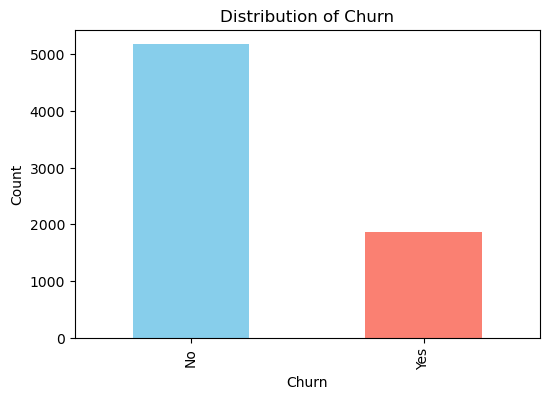

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
data['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


C:\Users\Arams\AppData\Local\Temp\ipykernel_14464\3020957667.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


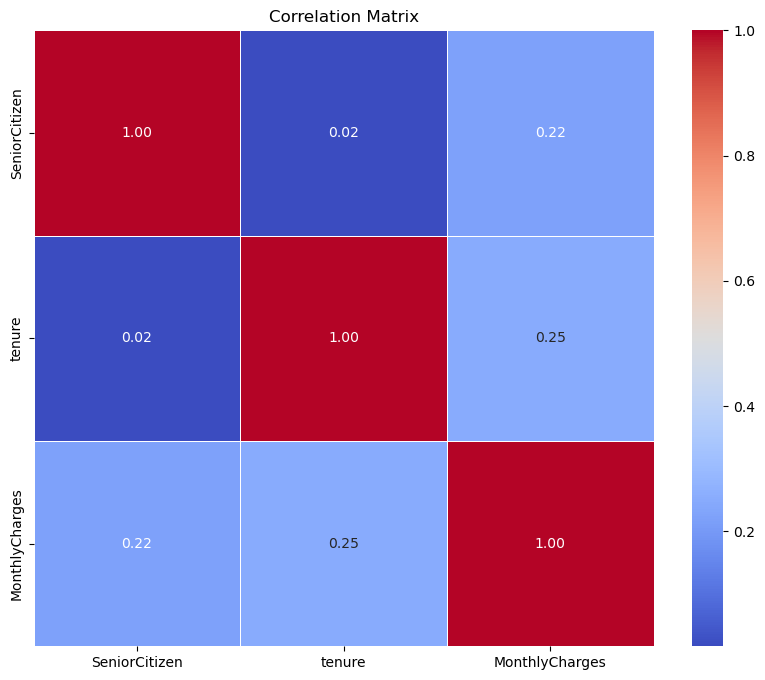

In [36]:
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


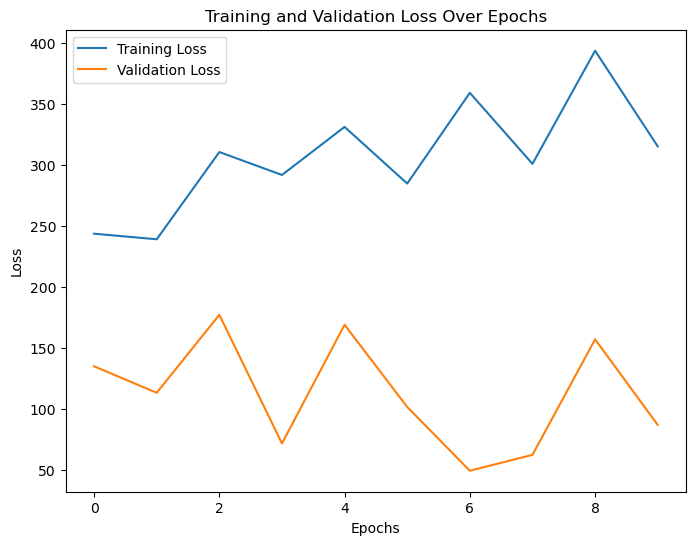

In [38]:
history = nn_model.fit(X_train_imputed, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test_imputed, y_test_onehot), verbose=0)

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
